<a href="https://colab.research.google.com/github/arunsechergy/EVA/blob/master/Assignment9/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime

print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-26 15:37:20.958129


In [2]:
!pip install --upgrade --no-deps --force-reinstall git+http://github.com/arunsechergy/AgentVision.git#egg=agentvision

  Cloning http://github.com/arunsechergy/AgentVision.git to /tmp/pip-install-b2n7zxn4/agentvision
  Running command git clone -q http://github.com/arunsechergy/AgentVision.git /tmp/pip-install-b2n7zxn4/agentvision
  Created wheel for agentvision: filename=agentvision-0.0.1-cp36-none-any.whl size=12415 sha256=1b91a1fa0b3179f88280ef434b82fb02cdca267cb664beb4a4ea5cfc96ad0b2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-lpurzsf2/wheels/81/af/2a/e070043590a198577e108f1491c6c14ebb9f305a91b0812d1b
Successfully built agentvision


In [4]:
import torch.nn as nn
import torch.nn.functional as F

from agentvision.base_model import BaseModel

class QuizModel(BaseModel):
    def __init__(self, dropout_value=0.25):
        self.dropout_value = dropout_value

        super(QuizModel, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.convblock3 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.pool1 = nn.MaxPool2d(2, 2)

        self.convblock4 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=(1, 1), bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock6 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.pool2 = nn.MaxPool2d(2, 2)

        self.convblock7 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=(1, 1), dilation=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock8 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
        self.convblock9 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )
    
        self.convblock10 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(self.dropout_value)
        )

        self.gap = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.convblock11 = nn.Sequential(
            nn.Conv2d(128, 10, kernel_size=(1, 1), bias=False),
        )

    def forward(self, x):
        x1 = self.convblock1(x)  # x1 = Input
        x2 = self.convblock2(x1)  # x2 = x1
        x3 = self.convblock3(x1 + x2)  # x3 = x1 + x2
        x4 = self.pool1(x1 + x2 + x3)

        x4 = self.convblock4(x4)

        x5 = self.convblock5(x4)
        x6 = self.convblock6(x4 + x5)
        x7 = self.convblock6(x4 + x5 + x6)
        x8 = self.pool2(x5 + x6 + x7)

        x8 = self.convblock7(x8)

        x9 = self.convblock8(x8)
        x10 = self.convblock9(x8 + x9)
        x11 = self.convblock10(x8 + x9 + x10)

        x12 = self.gap(x11)
        x13 = self.convblock11(x12)

        x13 = x13.view(-1, 10)
        return x13

In [5]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 4.7MB/s 
     |████████████████████████████████| 952kB 14.4MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=a1fcdb9934c4bf4ca568b324a4d65ce7cc6ba8015cbe134badcbdba7d431f434
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
from agentvision.data_loader import ImageDataLoader
from agentvision.data_transform import CIFAR10Transforms
import albumentations as A

In [22]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [ A.RandomCrop(32, 32, p=0.8)
                     ,A.HorizontalFlip()
                     #,A.Cutout(num_holes=4)
                     ]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 128, True, 'CIFAR10', figure_size=(20,10))

Files already downloaded and verified
Files already downloaded and verified


In [8]:
import torch.nn as nn
import torch.nn.functional as F
from agentvision.learner import Learner

In [23]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=QuizModel(),loss_func=F.cross_entropy)

In [24]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

In [25]:
epoch = 39
lr = 0.01
cnn_learner.fit(epochs=epoch, lr=lr, step_size=7)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3289204835891724 Batch_id=390 Accuracy=37.80: 100%|██████████| 391/391 [00:16<00:00, 23.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 2.2519, Accuracy: 2866/10000 (28.66%)

EPOCH: 1


Loss=1.1635456085205078 Batch_id=390 Accuracy=54.55: 100%|██████████| 391/391 [00:16<00:00, 23.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 2.0446, Accuracy: 3581/10000 (35.81%)

EPOCH: 2


Loss=0.8812562823295593 Batch_id=390 Accuracy=61.36: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4366, Accuracy: 5077/10000 (50.77%)

EPOCH: 3


Loss=0.9729200601577759 Batch_id=390 Accuracy=64.80: 100%|██████████| 391/391 [00:16<00:00, 23.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3453, Accuracy: 5281/10000 (52.81%)

EPOCH: 4


Loss=0.9136199951171875 Batch_id=390 Accuracy=67.31: 100%|██████████| 391/391 [00:16<00:00, 24.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2115, Accuracy: 5655/10000 (56.55%)

EPOCH: 5


Loss=0.8551456332206726 Batch_id=390 Accuracy=69.15: 100%|██████████| 391/391 [00:16<00:00, 24.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1252, Accuracy: 6028/10000 (60.28%)

EPOCH: 6


Loss=0.765234649181366 Batch_id=390 Accuracy=70.39: 100%|██████████| 391/391 [00:16<00:00, 24.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0268, Accuracy: 6354/10000 (63.54%)

EPOCH: 7


Loss=0.9630461931228638 Batch_id=390 Accuracy=73.69: 100%|██████████| 391/391 [00:16<00:00, 24.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9580, Accuracy: 6602/10000 (66.02%)

EPOCH: 8


Loss=0.7621096968650818 Batch_id=390 Accuracy=74.21: 100%|██████████| 391/391 [00:16<00:00, 24.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9273, Accuracy: 6713/10000 (67.13%)

EPOCH: 9


Loss=0.8668840527534485 Batch_id=390 Accuracy=74.23: 100%|██████████| 391/391 [00:16<00:00, 24.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9457, Accuracy: 6673/10000 (66.73%)

EPOCH: 10


Loss=0.7586191892623901 Batch_id=390 Accuracy=74.69: 100%|██████████| 391/391 [00:16<00:00, 24.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9274, Accuracy: 6754/10000 (67.54%)

EPOCH: 11


Loss=0.7567568421363831 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:16<00:00, 24.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9070, Accuracy: 6821/10000 (68.21%)

EPOCH: 12


Loss=0.5075332522392273 Batch_id=390 Accuracy=75.21: 100%|██████████| 391/391 [00:16<00:00, 23.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9094, Accuracy: 6798/10000 (67.98%)

EPOCH: 13


Loss=0.548309862613678 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8942, Accuracy: 6842/10000 (68.42%)

EPOCH: 14


Loss=0.7554335594177246 Batch_id=131 Accuracy=75.53:  33%|███▎      | 130/391 [00:05<00:10, 24.49it/s]

KeyboardInterrupt: ignored

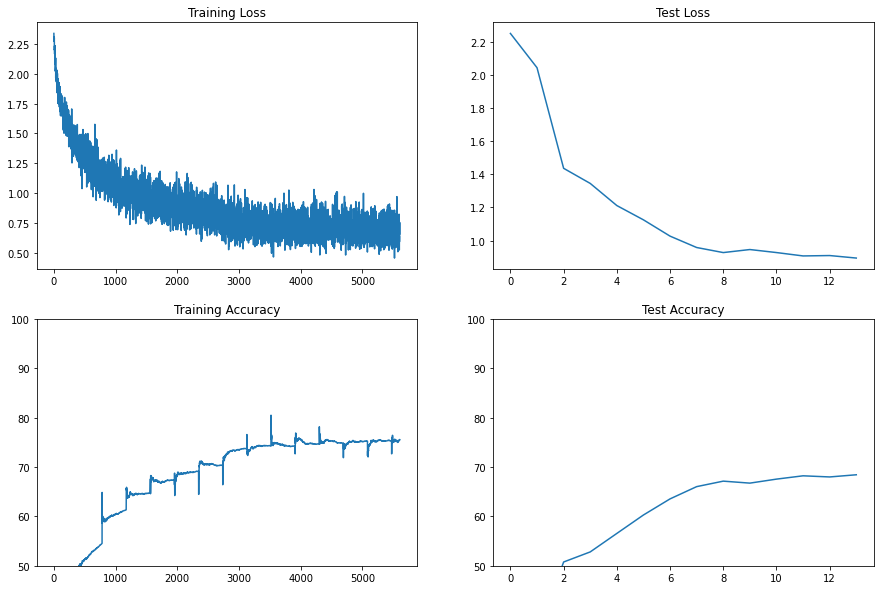

In [26]:
cnn_learner.plot_losses()